This dataset is from UCI_credit_card dataset

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
import lightgbm as lgb
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
from timeit import default_timer as timer

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.isnull().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

no missing value

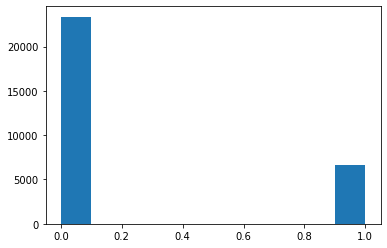

In [3]:
# check label balance
plt.hist(df['default.payment.next.month'])
plt.show()

A bit imbalanced

Now lets do some EDA

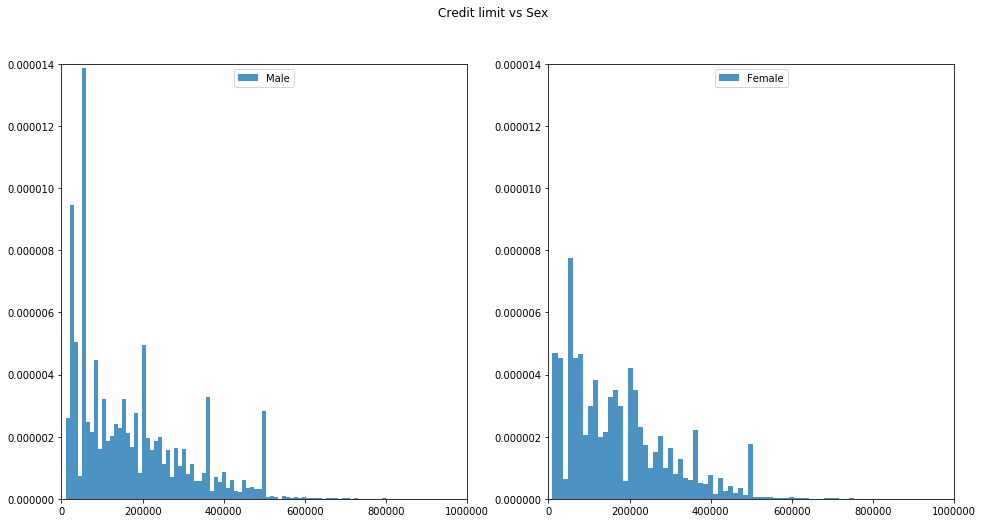

In [4]:
# credit limit vs different condition
plt.figure(1,figsize=(16,8))
plt.subplot(121)
plt.hist(df[df.SEX==1].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='Male')
plt.xlim(0,1000000)
plt.ylim(0,0.000014)
plt.legend(loc='upper center')

fig = plt.subplot(122)
plt.hist(df[df.SEX==2].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='Female')
plt.xlim(0,1000000)
plt.ylim(0,0.000014)
plt.legend(loc='upper center')
plt.suptitle('Credit limit vs Sex')
plt.show()

Most credit limits are below 200000 for both male and female. Male's credit limit has larger deviation compared to females

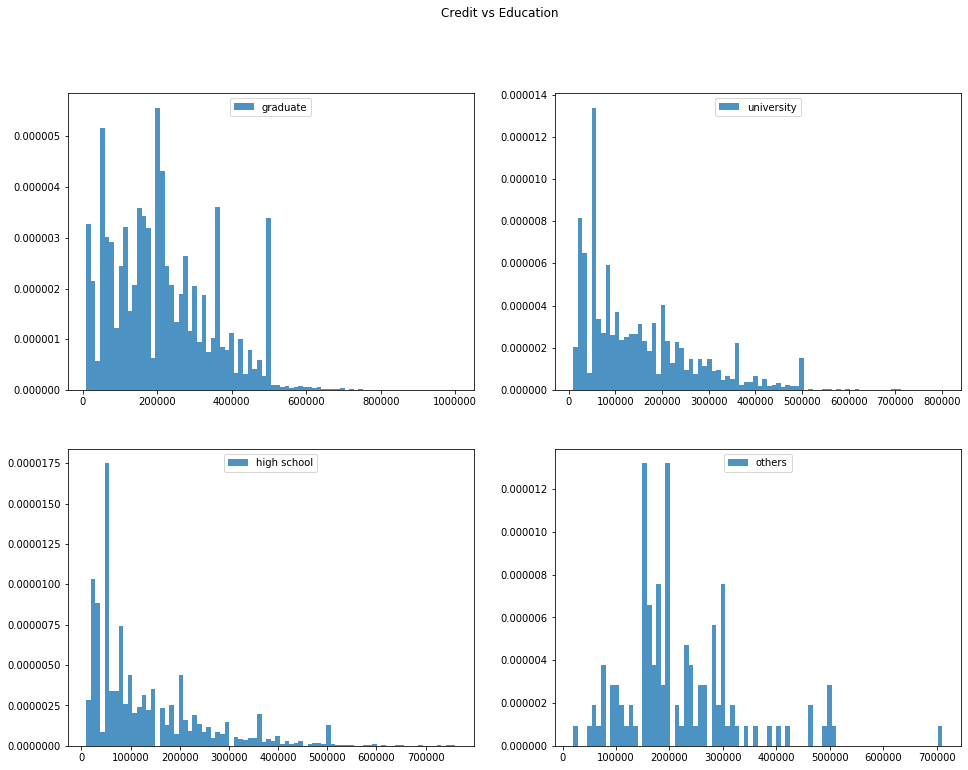

In [5]:
fig = plt.figure(2,figsize=(16,12))
fig = plt.subplot(221)
plt.hist(df[df.EDUCATION==1].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='graduate')
plt.legend(loc='upper center')
fig = plt.subplot(222)
plt.hist(df[df.EDUCATION==2].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='university')
plt.legend(loc='upper center')
fig = plt.subplot(223)
plt.hist(df[df.EDUCATION==3].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='high school')
plt.legend(loc='upper center')
fig = plt.subplot(224)
plt.hist(df[df.EDUCATION==4].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='others')
plt.legend(loc='upper center')
plt.suptitle('Credit vs Education')
plt.show()

Credit limit highly depends on education level. People with higher degree tends to have high credit limit, for example, graduate degree.

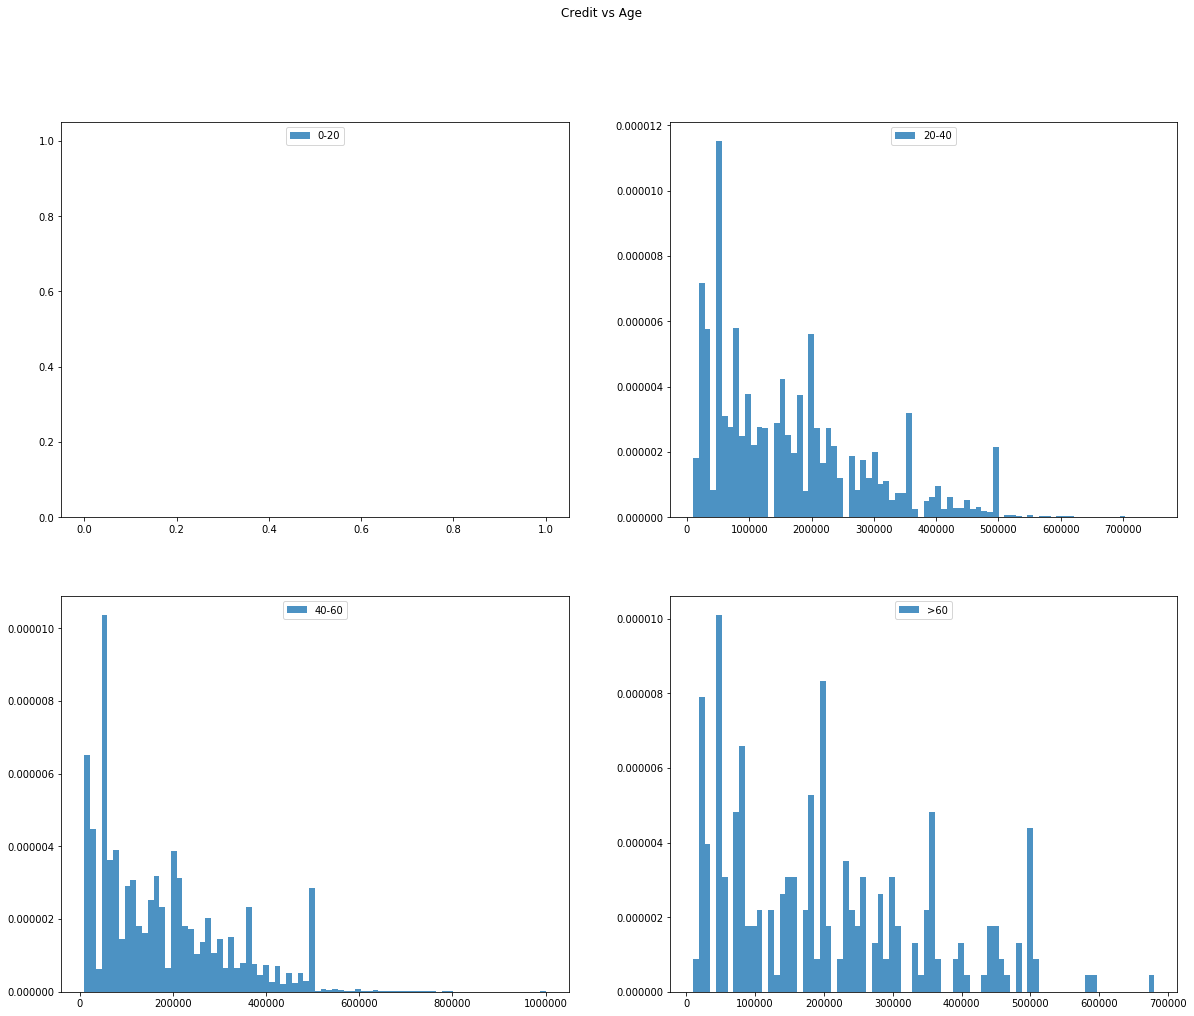

In [6]:
fig = plt.figure(4,figsize=(20,16))
fig = plt.subplot(221)
plt.hist(df[(df.AGE>0)&(df.AGE<=20)].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='0-20')
plt.legend(loc='upper center')
fig = plt.subplot(222)
plt.hist(df[(df.AGE>20)&(df.AGE<=40)].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='20-40')
plt.legend(loc='upper center')
fig = plt.subplot(223)
plt.hist(df[(df.AGE>40)&(df.AGE<=60)].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='40-60')
plt.legend(loc='upper center')
fig = plt.subplot(224)
plt.hist(df[df.AGE>60].LIMIT_BAL,bins=80,density=True,alpha=0.8,label='>60')
plt.legend(loc='upper center')
plt.suptitle('Credit vs Age')
plt.show()

Older people tend to have high credic limit

############################################################
# meachine learining


In [7]:
# create labels and features
label = ['default.payment.next.month']
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

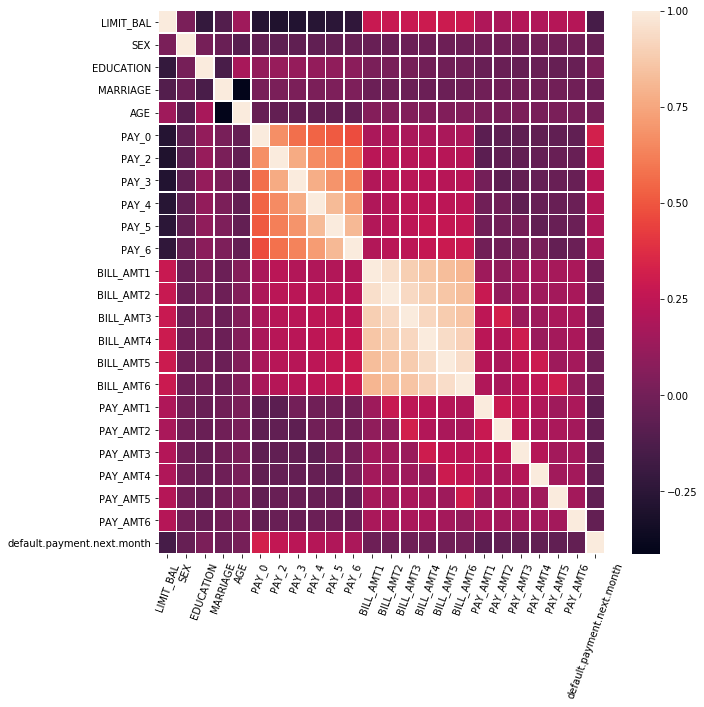

In [8]:
#correlation matrics
plt.figure(figsize=(10,10))
sns.heatmap(df[features+label].corr(),linewidths=0.5)
plt.xticks(rotation=70)
plt.show()

The default depends on payment to some extent, sounds reasonable.
If the client has a bad history of paying on time, it is highly likely that he/she will continue to do so compared to other customers.

In [9]:
# train test split
df_train,df_test = train_test_split(df,test_size=0.2,random_state=1,shuffle=True)

1. logistic Regression

In [10]:
Lr_clf = LogisticRegression(C=10)
Lr_cv = model_selection.cross_validate(Lr_clf,df_train[features],df_train[label].values,cv=5, scoring='accuracy',
                                       return_train_score=True)
print('Train_score is {:.3f}±{:.6f}'.format(Lr_cv['train_score'].mean(),Lr_cv['train_score'].std()))
print('Test_score is {:.3f}±{:.6f}'.format(Lr_cv['test_score'].mean(),Lr_cv['test_score'].std()))

Train_score is 0.779±0.000037
Test_score is 0.779±0.000088


Logistic regression has 0.779 accuracy score, showing no overfititng with the model.

In [11]:
Lr_start = timer()

Lr_clf.fit(df_train[features],df_train[label])

Lr_end = timer()
Lr_time = Lr_end-Lr_start
Lr_acc_score = accuracy_score(df_test[label], Lr_clf.predict(df_test[features]))
print('Logistic Regression accuracy score is: {:.3f}'.format(Lr_acc_score))
print('Classification Report:\n',classification_report(df_test[label], Lr_clf.predict(df_test[features])))

Logistic Regression accuracy score is: 0.777
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      4663
           1       0.00      0.00      0.00      1337

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.78      0.68      6000



Not a very high accuracy score, at the same time, precision for 0 is the same as overall accuracy, meaning this model predicts all clients to be non-default, thus is a very poor classifier

2.SVM

In [12]:
SVM_clf = svm.SVC()

SVM_start = timer()

SVM_clf.fit(df_train[features],df_train[label])

SVM_end = timer()
SVM_time = SVM_end-SVM_start
SVM_acc_score = accuracy_score(df_test[label], SVM_clf.predict(df_test[features]))
print('SVM accuracy score is: {:.3f}'.format(SVM_acc_score))
print('Classification Report:\n',classification_report(df_test[label], SVM_clf.predict(df_test[features])))

SVM accuracy score is: 0.778
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      4663
           1       0.63      0.01      0.02      1337

    accuracy                           0.78      6000
   macro avg       0.70      0.51      0.45      6000
weighted avg       0.75      0.78      0.69      6000



SVM is too slow, won't spend too much time tuning the parameters

3.Decision Tree

In [13]:
DT_clf = tree.DecisionTreeClassifier()
DT_cv = model_selection.cross_validate(DT_clf,df_train[features],df_train[label].values,cv=5, scoring='accuracy',
                                      return_train_score=True)
print('Train_score is {:.3f}±{:.6f}'.format(DT_cv['train_score'].mean(),DT_cv['train_score'].std()))
print('Test_score is {:.3f}±{:.6f}'.format(DT_cv['test_score'].mean(),DT_cv['test_score'].std()))

Train_score is 0.999±0.000090
Test_score is 0.724±0.004572


Default parameters give very high overfitting, need to find the best params

In [15]:
DT_clf_Gsearch = model_selection.GridSearchCV(DT_clf,param_grid={'max_depth':[2,4,6,8],
                                                          'min_samples_leaf':[6,8,10]}, cv=5, return_train_score=True, scoring='accuracy')
DT_clf_Gsearch.fit(df_train[features],df_train[label])
DT_clf_Gsearch_pred = DT_clf_Gsearch.best_estimator_.predict(df_test[features])
print('Best parameters are {}'.format(DT_clf_Gsearch.best_params_))
print('Best accuracy score is {}'.format(accuracy_score(df_test[label],DT_clf_Gsearch_pred)))

Best parameters are {'max_depth': 4, 'min_samples_leaf': 10}
Best accuracy score is 0.8193333333333334


In [16]:
DT_clf = tree.DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)

DT_start = timer()

DT_clf.fit(df_train[features],df_train[label])

DT_end = timer()
DT_time = DT_end-DT_start
DT_acc_score = accuracy_score(df_test[label], DT_clf.predict(df_test[features]))
print('Decision Tree accuracy score is: {:.3f}'.format(DT_acc_score))
print('Classification Report:\n',classification_report(df_test[label], DT_clf.predict(df_test[features])))

Decision Tree accuracy score is: 0.819
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.69      0.35      0.46      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



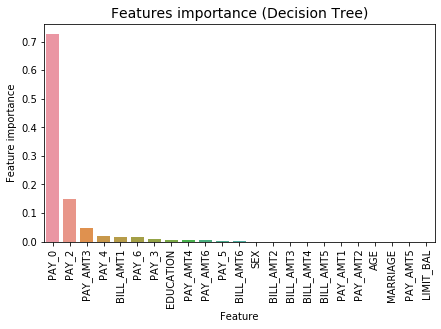

In [17]:
DT_feature_imp = pd.DataFrame({'Feature': df[features].columns, 'Feature importance': DT_clf.feature_importances_})
DT_feature_imp = DT_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance (Decision Tree)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=DT_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

5.Randomforestclassifier

In [18]:
RF_clf = RandomForestClassifier()
RF_cv = model_selection.cross_validate(RF_clf,df_train[features],df_train[label].values,cv=5, scoring='accuracy',
                                      return_train_score=True)
print('Train_score is {:.3f}±{:.6f}'.format(RF_cv['train_score'].mean(),RF_cv['train_score'].std()))
print('Test_score is {:.3f}±{:.6f}'.format(RF_cv['test_score'].mean(),RF_cv['test_score'].std()))

Train_score is 0.980±0.001045
Test_score is 0.805±0.004352


Over fititng, need to find params

In [19]:
RF_clf_Gsearch = model_selection.GridSearchCV(RF_clf,param_grid={'max_depth':[2,4,6,8],
                                                          'min_samples_leaf':[6,8,10],'criterion':['gini','entropy'],
                                                            'n_estimators':[100]}, cv=5, return_train_score=True, scoring='accuracy')
RF_clf_Gsearch.fit(df_train[features],df_train[label])
RF_clf_Gsearch_pred = RF_clf_Gsearch.best_estimator_.predict(df_test[features])
print('Best parameters are {}'.format(RF_clf_Gsearch.best_params_))
print('Best accuracy score is {}'.format(accuracy_score(df_test[label],RF_clf_Gsearch_pred)))

Best parameters are {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'n_estimators': 100}
Best accuracy score is 0.8176666666666667


In [20]:
RF_clf = RandomForestClassifier(max_depth=8,min_samples_leaf=6,criterion='gini',n_estimators=100)

RF_start=timer()

RF_clf.fit(df_train[features],df_train[label])

RF_end = timer()
RF_time = RF_end-RF_start
RF_acc_score = accuracy_score(df_test[label], RF_clf.predict(df_test[features]))
print('Random Forest accuracy score is: {:.3f}'.format(RF_acc_score))
print('Classification Report:\n',classification_report(df_test[label], RF_clf.predict(df_test[features])))

Random Forest accuracy score is: 0.817
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      4663
           1       0.68      0.34      0.45      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



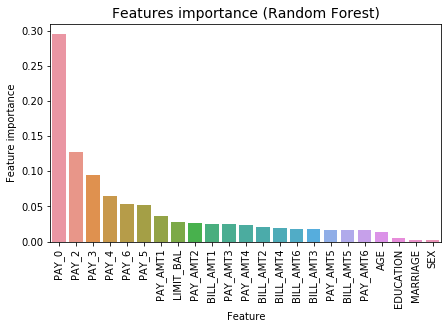

In [21]:
RF_feature_imp = pd.DataFrame({'Feature': df[features].columns, 'Feature importance': RF_clf.feature_importances_})
RF_feature_imp = RF_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance (Random Forest)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=RF_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

Adaboost

In [23]:
Ada_clf = AdaBoostClassifier(n_estimators=50,random_state=1,learning_rate=0.01)
Ada_cv = model_selection.cross_validate(Ada_clf,df_train[features],df_train[label].values,cv=5, scoring='accuracy',
                                       return_train_score=True)
print('Train_score is {:.3f}±{:.6f}'.format(Ada_cv['train_score'].mean(),Ada_cv['train_score'].std()))
print('Test_score is {:.3f}±{:.6f}'.format(Ada_cv['test_score'].mean(),Ada_cv['test_score'].std()))

Train_score is 0.820±0.001226
Test_score is 0.820±0.004903


In [24]:
Ada_clf = AdaBoostClassifier(n_estimators=50,random_state=1,learning_rate=0.01)

Ada_start=timer()

Ada_clf.fit(df_train[features],df_train[label])

Ada_end = timer()
Ada_time = Ada_end-Ada_start
Ada_acc_score = accuracy_score(df_test[label], Ada_clf.predict(df_test[features]))
print('Decision Tree accuracy score is: {:.3f}'.format(Ada_acc_score))
print('Classification Report:\n',classification_report(df_test[label], Ada_clf.predict(df_test[features])))

Decision Tree accuracy score is: 0.818
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4663
           1       0.71      0.31      0.43      1337

    accuracy                           0.82      6000
   macro avg       0.77      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



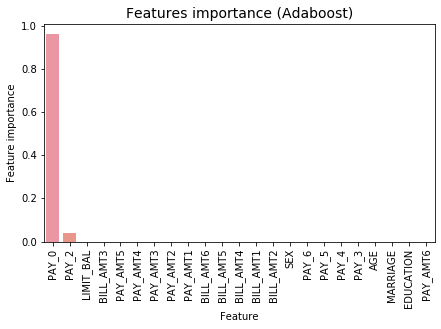

In [25]:
Ada_feature_imp = pd.DataFrame({'Feature': df[features].columns, 'Feature importance': Ada_clf.feature_importances_})
Ada_feature_imp = Ada_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance (Adaboost)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=Ada_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

XGBoost

In [26]:
XGB_clf = xgb.XGBClassifier(objective="binary:logistic", eval_metric='error',random_state=1)
XGB_cv = model_selection.cross_validate(XGB_clf,df_train[features],df_train[label].values,cv=5, scoring='accuracy',
                                       return_train_score=True)
print('Train_score is {:.3f}±{:.6f}'.format(XGB_cv['train_score'].mean(),XGB_cv['train_score'].std()))
print('Test_score is {:.3f}±{:.6f}'.format(XGB_cv['test_score'].mean(),XGB_cv['test_score'].std()))

Train_score is 0.826±0.000936
Test_score is 0.822±0.003737


In [27]:
XGB_clf_Gsearch = model_selection.GridSearchCV(XGB_clf,param_grid={'max_depth':[2,4],
                                                            'eta':[0.05,0,1],
                                                             'min_child_weight':[1,3],
                                                            'gamma':[0.1,0.2,0.3]}, cv=5, return_train_score=True, scoring='accuracy')

XGB_clf_Gsearch.fit(df_train[features],df_train[label])
XGB_clf_Gsearch_pred = XGB_clf_Gsearch.best_estimator_.predict(df_test[features])
print('Best parameters are {}'.format(XGB_clf_Gsearch.best_params_))
print('Best accuracy score is {}'.format(accuracy_score(df_test[label],XGB_clf_Gsearch_pred)))

Best parameters are {'eta': 0.05, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 3}
Best accuracy score is 0.821


In [28]:
XGB_clf = xgb.XGBClassifier(objective="binary:logistic", eval_metric='error',random_state=1,eta=0.05,gamma=0.3,max_depth=4,min_child_weight=3)

XGB_start=timer()

XGB_clf.fit(df_train[features],df_train[label])

XGB_end = timer()
XGB_time = XGB_end-XGB_start
XGB_acc_score = accuracy_score(df_test[label], XGB_clf.predict(df_test[features]))
print('Decision Tree accuracy score is: {:.3f}'.format(XGB_acc_score))
print('Classification Report:\n',classification_report(df_test[label], XGB_clf.predict(df_test[features])))

Decision Tree accuracy score is: 0.821
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.69      0.36      0.47      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



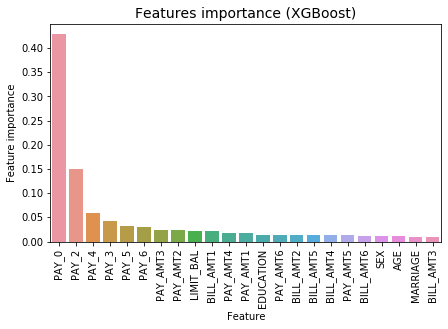

In [29]:
XGB_feature_imp = pd.DataFrame({'Feature': df[features].columns, 'Feature importance': XGB_clf.feature_importances_})
XGB_feature_imp = XGB_feature_imp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance (XGBoost)',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=XGB_feature_imp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [32]:
# plot all the metrics together
dic = {'param':['accuracy','Precision','Recall','Elapse Time (s)'],
       'Logistic Regression':[0.777, 0, 0,Lr_time],
       'Decision Tree':[0.819,0.69,0.35,DT_time],
       'Random Forest':[0.818,0.68,0.34,RF_time],
       'Adaboost':[0.818,0.71,0.31,Ada_time],
       'XGBoost':[0.821,0.69,0.36,XGB_time],
       'SVM':[0,0,0,SVM_time]
      }
df_model = pd.DataFrame(dic)

In [33]:
df_model

,param,Logistic Regression,Decision Tree,Random Forest,Adaboost,XGBoost,SVM
0,accuracy,0.777000,0.81900,0.818000,0.818000,0.821000,0.000000
1,Precision,0.000000,0.69000,0.680000,0.710000,0.690000,0.000000
2,Recall,0.000000,0.35000,0.340000,0.310000,0.360000,0.000000
3,Elapse Time (s),1.223846,0.12537,2.917802,1.717743,4.615132,184.664189


Summery:

1. Decision Tree, Random forest, Adaboost, XGBoost have pretty similar accuracy scores ~81-82%
2. In this question, a more meaningful metrics is recall. Recall= TP/(TP+FN), it is important when the cost of false negative is high. 
   In the credit card default case, if the bank fails to predict a default, it will cause significant loss to the bank.
   Among all the models, Decision Tree and XGBoost have highest recalls (0.35 and 0.36).
   But the time for training a XGBoost is almost 40 times of that for Decision Tree.
   The current dataframe only has 30000 observations in total, so either 0.12 s or 4.6 s are both acceptable. But if we have a very large
   dataset,maybe Decision Tree is a good option in terms of training time
3. SVM take so long, didn't preceed with it
4. When plotting out the feature importances of different models, seems the results varies, but generally, the history of on time payment is a good indicator for future possibility of default.